# VGG16

Paul Thai

In [1]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

Preparing the Data

In [2]:
# Now we will set the path:
# For this jupyter notebook, I am doing inside the repo folder, hopefully this works for you guys as well, let me know if it doesn't
data_path = pathlib.Path("../DATA").with_suffix('')
print(data_path)

..\DATA


In [3]:
# check to see how many images are in the folder
images_count = len(list(data_path.glob('*/*.jpeg')))
print(images_count)

3091


In [4]:
# specify the batch size nad the image size for the training
batch_size = 32 # smaller bathes gives better results
height = 224
width = 224

In [5]:
# create the data set for training
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_path,
    validation_split=.2,
    subset="training",
    seed=123,
    image_size=(height,width),
    batch_size=batch_size
)

Found 3091 files belonging to 2 classes.
Using 2473 files for training.


In [6]:
# create the data set for validation
validate_dataset = tf.keras.utils.image_dataset_from_directory(
    data_path,
    validation_split=.2,
    subset="validation",
    seed=123,
    image_size=(height,width),
    batch_size=batch_size
)

Found 3091 files belonging to 2 classes.
Using 618 files for validation.


Just remember that:   
0 = Without covid  
1 = With Covid  

In [7]:
# finding the class names
class_names = train_dataset.class_names
print(class_names)

['0', '1']


Configuring the dataset for performance

In [8]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
# validate_dataset = validate_dataset.cache().prefetch(buffer_size=AUTOTUNE)

Creating the Model

In [9]:
# creating the model - In Keras, the VGG16 architecture can be implemented using Sequential
model = Sequential()


In [10]:
# First Convolutional Block
model.add(
    Conv2D(
        input_shape=(height,width,3),
        filters = 64,
        kernel_size=(3,3),
        padding='same',
        activation = 'relu'
    )
)

model.add(
    Conv2D(
        filters = 64,
        kernel_size=(3,3),
        padding='same',
        activation = 'relu'
    )
)

model.add(
    MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2)
    )
)

In [11]:
# Second Convolutional Block
model.add(
    Conv2D(
        filters = 128,
        kernel_size=(3,3),
        padding='same',
        activation = 'relu'
    )
)

model.add(
    Conv2D(
        filters = 128,
        kernel_size=(3,3),
        padding='same',
        activation = 'relu'
    )
)

model.add(
    MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2)
    )
)

In [12]:
# Third Convolutional Block
model.add(
    Conv2D(
        filters = 256,
        kernel_size=(3,3),
        padding='same',
        activation = 'relu'
    )
)

model.add(
    Conv2D(
        filters = 256,
        kernel_size=(3,3),
        padding='same',
        activation = 'relu'
    )
)

model.add(
    Conv2D(
        filters = 256,
        kernel_size=(3,3),
        padding='same',
        activation = 'relu'
    )
)

model.add(
    MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2)
    )
)

In [13]:
# Fourth Convolutional Block
model.add(
    Conv2D(
        filters = 512,
        kernel_size=(3,3),
        padding='same',
        activation = 'relu'
    )
)

model.add(
    Conv2D(
        filters = 512,
        kernel_size=(3,3),
        padding='same',
        activation = 'relu'
    )
)

model.add(
    Conv2D(
        filters = 512,
        kernel_size=(3,3),
        padding='same',
        activation = 'relu'
    )
)

model.add(
    MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2)
    )
)

In [14]:
# Fifth Convolutional Block
model.add(
    Conv2D(
        filters = 512,
        kernel_size=(3,3),
        padding='same',
        activation = 'relu'
    )
)

model.add(
    Conv2D(
        filters = 512,
        kernel_size=(3,3),
        padding='same',
        activation = 'relu'
    )
)

model.add(
    Conv2D(
        filters = 512,
        kernel_size=(3,3),
        padding='same',
        activation = 'relu'
    )
)

model.add(
    MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2)
    )
)

In [15]:
# Dense Layers
model.add(
    Flatten()
)

model.add(
    Dense(
        units=4096,
        activation='relu'
    )
)

model.add(
    Dense(
        units=4096,
        activation='relu'
    )
)

model.add(
    Dense(
        units=2,
        activation='softmax'
    )
)

Compiling and Fitting the Model

In [16]:
# use the Adam optimization algorithm to train the deep neural network
optimize = Adam(learning_rate=0.001)

In [17]:
# compile the model
model.compile(
    optimizer=optimize,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

### Summary of the Model

In [18]:
# model.summary()

### ModelCheckpoint and Early Stopping

- ModelCheckpoint - save the model weights as certain intervals during training. This helps load saved weights to make predictions or continue training the model. 
- EarlyStopping - stop the training of the model when a monitored quantity has stopped improving. This prevents overfitting and saved time by avoiding unnecessary training on a model that is not improving. 

In [19]:
# create the checkpoint
checkPoint = ModelCheckpoint(
    "./vgg16.hdf5",
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch',
)

In [20]:
# creating the early stop
earlyStop = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=5,
    mode='min'
)

In [21]:
# create the histogram fitting the data
results = model.fit(
    train_dataset,
    validation_data=validate_dataset,
    epochs=2,
    callbacks=[checkPoint,earlyStop]
)


Epoch 1/2
78/78 [==============================] - 541s 7s/step - loss: 198.9556 - accuracy: 0.5390 - val_loss: 0.6798 - val_accuracy: 0.5858
Epoch 2/2
78/78 [==============================] - 508s 7s/step - loss: 0.6831 - accuracy: 0.5774 - val_loss: 0.6793 - val_accuracy: 0.5858


Plot for visual representation

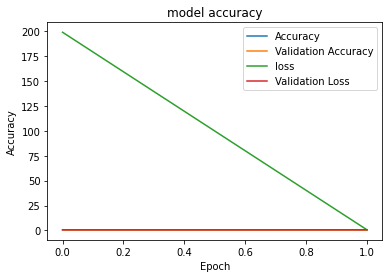

In [23]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()